In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.transforms as mtransforms
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import geopandas as gpd
import random

In [2]:
from google.colab import files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_pattern = '*.csv'
# file_paths = glob.glob("/content/drive/MyDrive/Colab Notebooks/Assesment Intro to Data Science/DataSet/*.csv")
file_paths = glob.glob("assets/Dataset*.csv")
data = []
dataframes = []

In [5]:
for idx,file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    dataframes.append(df)

In [6]:
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df['crisis_ds'] = pd.to_datetime(combined_df.crisis_ds)
combined_df['ds'] = pd.to_datetime(combined_df['ds'])

combined_df['activity_year'] = combined_df['ds'].apply(lambda y: y.year)
combined_df['activity_month'] = combined_df['ds'].apply(lambda m: m.strftime('%B'))
combined_df['isWeekend'] = combined_df['ds'].apply(lambda w: 'Yes' if w.strftime('%A') in ['Saturday','Sunday'] else 'No')
combined_df['country_title_len'] = combined_df['gadm0_name'].apply(lambda c: len(c))

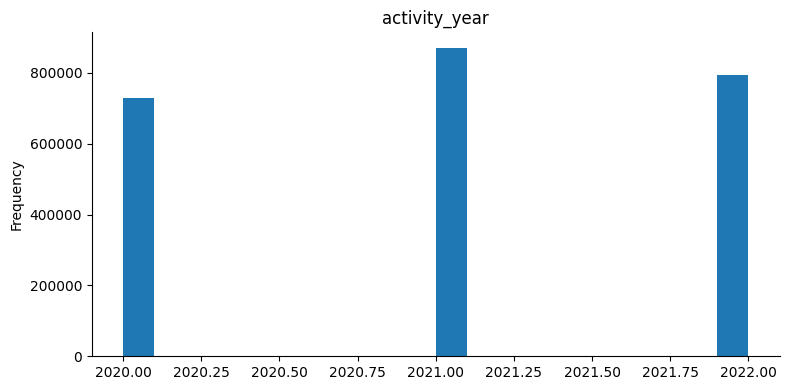

In [7]:
### Most Activities in  year
def activities_by_year(df, colname, num_bins=20, figscale=1):
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  # fig, ax = plt.subplots(figsize=(10,6))
  # ax.hist(df[colname],bins=8, linewidth=0.5, edgecolor="white")
  plt.tight_layout()
  # plt.savefig('most_active_year.png')
  # files.download('most_active_year.png')

chart = activities_by_year(combined_df, *['activity_year'])

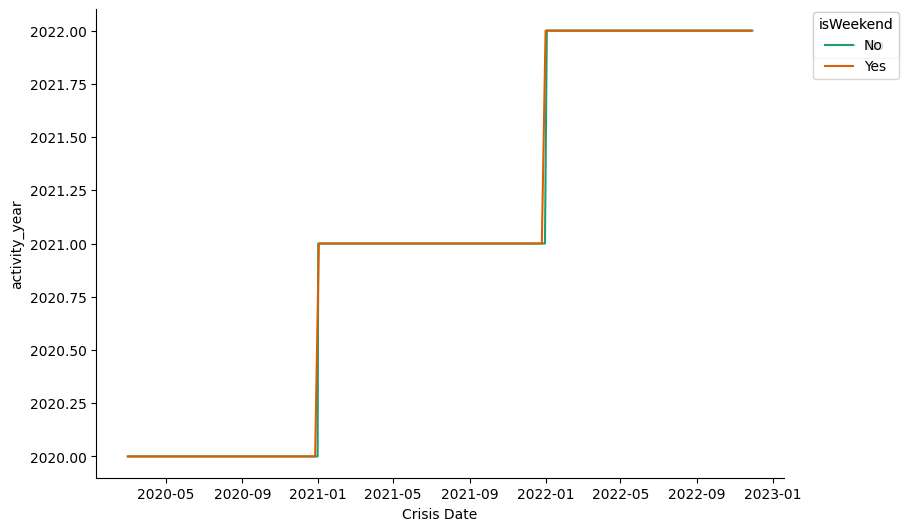

In [8]:
def activities_with_year(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['activity_year']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])
fig, ax = plt.subplots(figsize=(8, 5.2), layout='constrained')
df_sorted = combined_df.sort_values('ds', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('isWeekend')):
  activities_with_year(series, series_name, i)
  fig.legend(title='isWeekend', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Crisis Date')
# plt.savefig('activities_with_week_nonweek.png')
# files.download('activities_with_week_nonweek.png')
_ = plt.ylabel('activity_year')

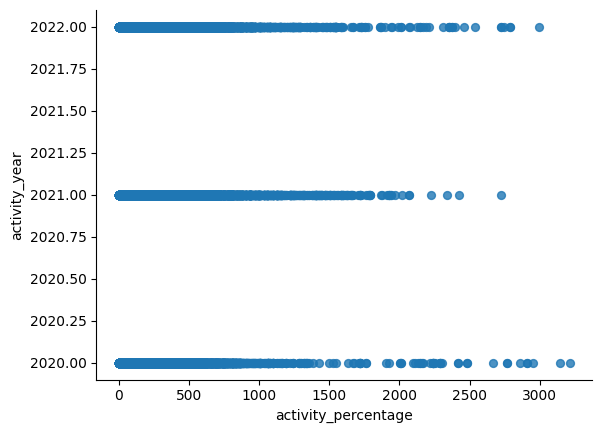

In [9]:
## change in activity percentage in crisis years
combined_df.plot(kind='scatter', x='activity_percentage', y='activity_year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
# plt.savefig('activity_percentage_with_year.png')
# files.download('activity_percentage_with_year.png')

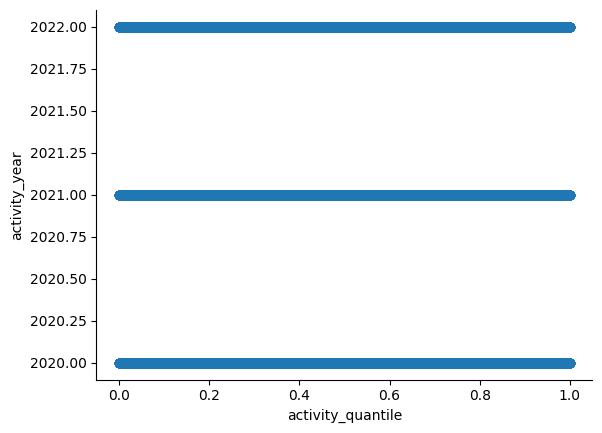

In [10]:
combined_df.plot(kind='scatter', x='activity_quantile', y='activity_year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

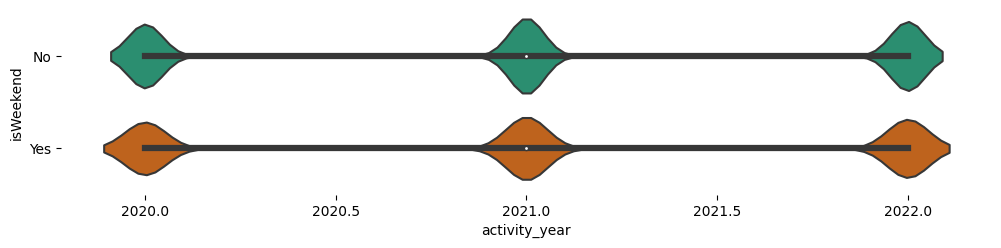

In [11]:
## Distribution of activities based on weekend and non-weekend during crisis year

figsize = (12, 1.2 * len(combined_df['isWeekend'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(combined_df, x='activity_year', y='isWeekend', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.savefig('activity_distribution.png')
files.download('activity_distribution.png')

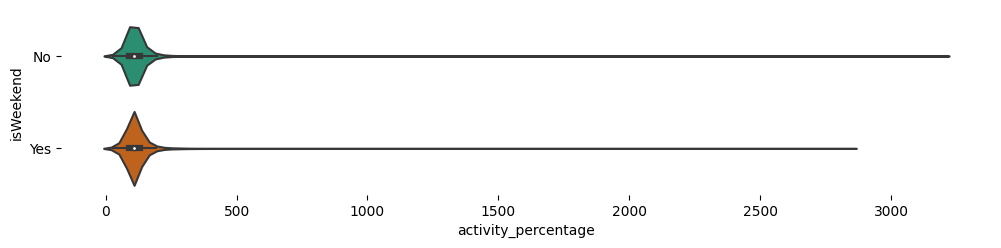

In [12]:
## Distribution of activity percentage based on weekend and non-weekend during crisis
figsize = (12, 1.2 * len(combined_df['isWeekend'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(combined_df, x='activity_percentage', y='isWeekend', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
# plt.savefig('activity_percentage_distribution.png')
# files.download('activity_percentage_distribution.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

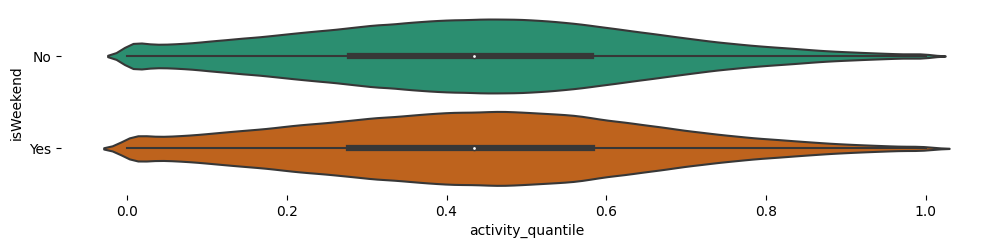

In [13]:
## Distribution of activity percentage based on weekend and non-weekend during crisis
figsize = (12, 1.2 * len(combined_df['isWeekend'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(combined_df, x='activity_quantile', y='isWeekend', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.savefig('activity_quantile_distribution.png')
files.download('activity_quantile_distribution.png')

In [14]:

# =============>   Cal the no of dates depending upon the country and various business    ===============>
total_dates = combined_df.groupby(['gadm_name','business_vertical'])['ds'].agg([('dates_count','nunique')])
# <=====================================>
ndf = total_dates.apply(lambda x: x)
total_dates = total_dates.sort_values('dates_count', ascending=True)
total_dates.head(10)

dates_count
gadm_name             business_vertical                        
Turkmenistan          Retail                                  1
Akrotiri and Dhekelia All                                  1004
Norfolk Island        All                                  1004
                      Local Events                         1004
                      Restaurants                          1004
                      Travel                               1004
Northern Cyprus       All                                  1004
                      Business & Utility Services          1004
                      Grocery & Convenience Stores         1004
                      Home Services                        1004

In [ ]:
total_countries = combined_df['gadm_name'].nunique()
total_countries

220

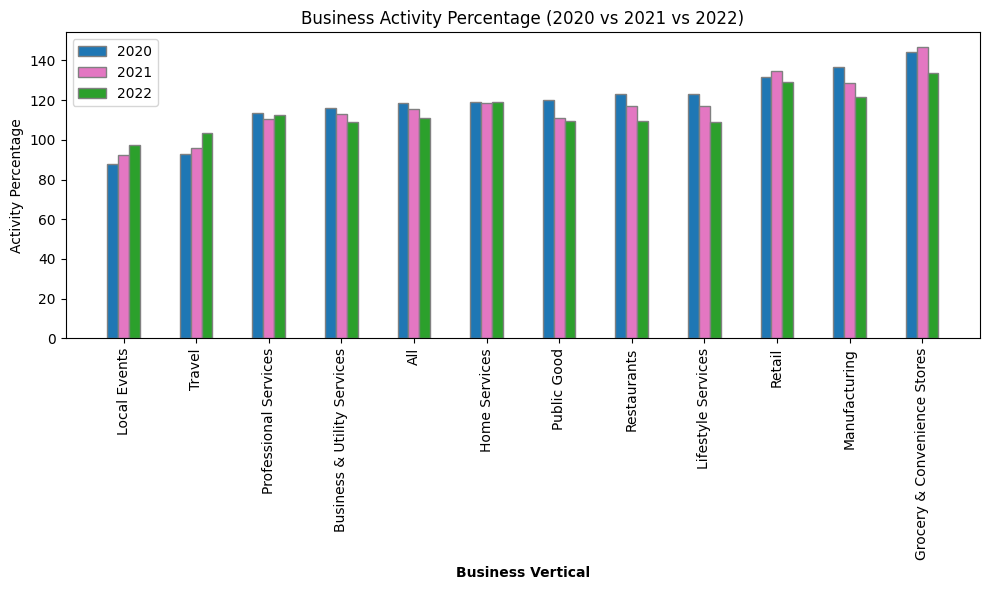

In [15]:

df_2020 = combined_df[combined_df['activity_year'] == 2020].groupby('business_vertical')['activity_percentage'].mean()
df_2021 = combined_df[combined_df['activity_year'] == 2021].groupby('business_vertical')['activity_percentage'].mean()
df_2022 = combined_df[combined_df['activity_year'] == 2022].groupby('business_vertical')['activity_percentage'].mean()


years_df = pd.DataFrame({
    '2020': df_2020,
    '2021': df_2021,
    '2022': df_2022
}).reset_index()

years_sorted = years_df.sort_values('2020')

plt.figure(figsize=(10, 6))
bar_width = 0.15

r1 = range(len(years_sorted))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, years_sorted['2020'], color='#1f77b4', width=bar_width, edgecolor='grey', label='2020')
plt.bar(r2, years_sorted['2021'], color='#e377c2', width=bar_width, edgecolor='grey', label='2021')
plt.bar(r3, years_sorted['2022'], color='#2ca02c', width=bar_width, edgecolor='grey', label='2022')


plt.xlabel('Business Vertical', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(years_sorted))], years_sorted['business_vertical'], rotation=90)
plt.ylabel('Activity Percentage')
plt.title('Business Activity Percentage (2020 vs 2021 vs 2022)')

plt.legend()
plt.tight_layout()
# plt.savefig('country_business_counts.png')
# files.download('country_business_counts.png')
plt.show()

In [21]:
total_businesses = combined_df['business_vertical'].nunique()
total_businesses
combined_df['business_vertical'].unique()

array(['Lifestyle Services', 'Home Services', 'Retail',
       'Business & Utility Services', 'Restaurants', 'Public Good',
       'Manufacturing', 'Grocery & Convenience Stores', 'All',
       'Professional Services', 'Local Events', 'Travel'], dtype=object)

In [22]:
def get_businesses_in_country(temp_df):
  dff = temp_df[temp_df['business_count'] < 9]
  colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range(len(df))]
  fig, ax = plt.subplots(figsize=(10,6))
  ax.bar(dff['gadm0_name'], dff['business_count'], width=0.5, edgecolor="white", linewidth=0.7, color=colors)
  for p in ax.patches:
      ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
  plt.title('Business count in countries')
  plt.xticks(rotation=40)
  plt.tight_layout()
  # plt.savefig('country_business_counts.png')
  # files.download('country_business_counts.png')
  plt.show()

In [19]:

business_df = combined_df
business_df['gadm0_name'].nunique()
# yy = business_df.groupby(['gadm0_name','ds','activity_percentage'])['business_vertical'].agg([('business_count','count'),('business_vertical_list','unique')]).reset_index()
country_business_count = business_df.groupby(['gadm0_name','country_title_len'])['business_vertical'].agg([('business_vertical_list','unique')]).reset_index()
country_business_count['business_count'] = country_business_count['business_vertical_list'].apply(lambda x: len(x))
# country_business_count['continent'] = country_business_count['gadm0_name'].apply(lambda c: get_continent(c))
temp_df = country_business_count.sort_values(by=['country_title_len'],ascending=True)
dff = temp_df[temp_df['business_count'] < 9]


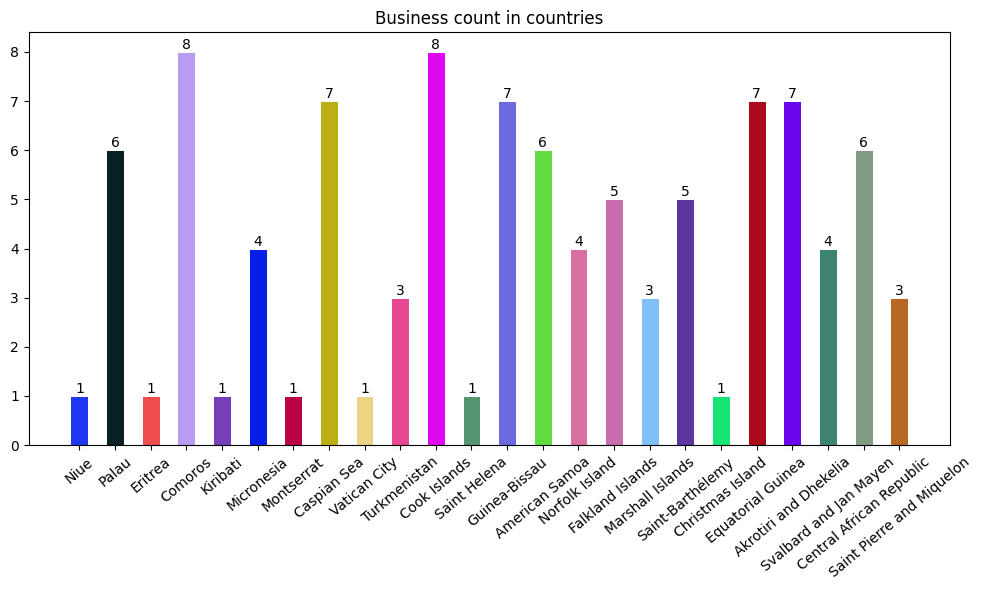

In [20]:
business_df = combined_df
country_business_count = business_df.groupby(['gadm0_name','country_title_len'])['business_vertical'].agg([('business_vertical_list','unique')]).reset_index()
country_business_count['business_count'] = country_business_count['business_vertical_list'].apply(lambda x: len(x))
# country_business_count['continent'] = country_business_count['gadm0_name'].apply(lambda c: get_continent(c))
temp_df = country_business_count.sort_values(by=['country_title_len'],ascending=True)

get_businesses_in_country(temp_df)

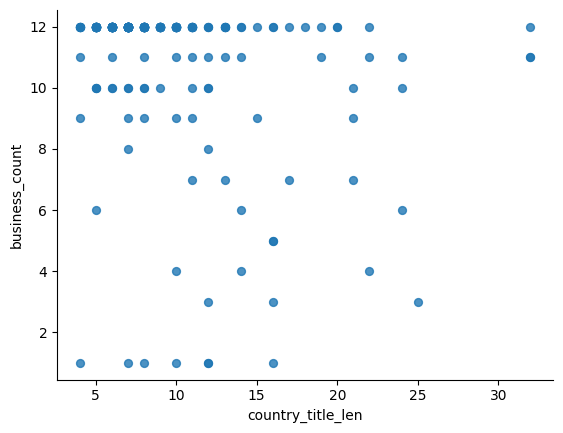

In [26]:
from matplotlib import pyplot as plt
country_business_count.plot(kind='scatter', x='country_title_len', y='business_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

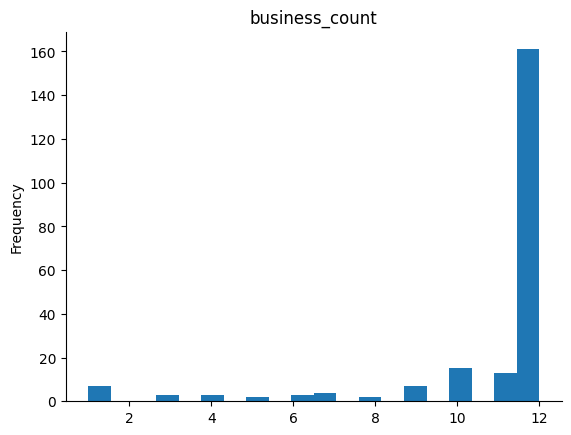

In [29]:
country_business_count['business_count'].plot(kind='hist', bins=20, title='business_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [30]:
# business_df_1 = combined_df
country_business_count_1 = combined_df.groupby(['gadm0_name','country_title_len'])['business_vertical'].agg([('business_vertical_list','unique')]).reset_index()
country_business_count_1['business_count'] = country_business_count['business_vertical_list'].apply(lambda x: len(x))
# country_business_count_1['continent'] = country_business_count['gadm0_name'].apply(lambda c: get_continent(c))
# temp_dff = country_business_count.sort_values(by=['country_title_len'],ascending=True)
country_business_count_1

gadm0_name  country_title_len  \
0    Akrotiri and Dhekelia                 21   
1                  Albania                  7   
2                  Algeria                  7   
3           American Samoa                 14   
4                  Andorra                  7   
..                     ...                ...   
215                Vietnam                  7   
216   Virgin Islands, U.S.                 20   
217                 Zambia                  6   
218               Zimbabwe                  8   
219                  Åland                  5   

                                business_vertical_list  business_count  
0    [Restaurants, Professional Services, Home Serv...               7  
1    [Business & Utility Services, Lifestyle Servic...              12  
2    [Professional Services, Business & Utility Ser...              12  
3    [Lifestyle Services, All, Home Services, Publi...               6  
4    [Retail, Professional Services, Travel, Busine...              12  
..                                                 ...             ...  
215  [Professional Services, Local Events, Grocery ...              12  
216  [Home Services, Grocery & Convenience Stores, ...              12  
217  [Manufacturing, Restaurants, Retail, Home Serv...              12  
218  [Lifestyle Services, Retail, Home Services, Pr...              12  
219  [Local Events, Grocery & Convenience Stores, R...              12  

[220 rows x 4 columns]

In [31]:
countries = ['Canada', 'Bhutan','Micronesia', 'Comoros', 'Turkmenistan']
country_dict = {}
for country in countries:
    country_df = combined_df[combined_df['gadm0_name'] == country][['business_vertical']]
    country_data = country_df['business_vertical'].unique()
    lamb_fun = lambda y: 12 if len(country_data) == 1 and country_data[0] == 'All' else len(country_data)
    country_dict[country] = lamb_fun(country_data)
country_df

business_vertical
991           Restaurants
1078                  All
4187          Restaurants
4191                  All
4922          Restaurants
...                   ...
2390234               All
2391914               All
2391915       Restaurants
2395639       Restaurants
2395755               All

[2009 rows x 1 columns]

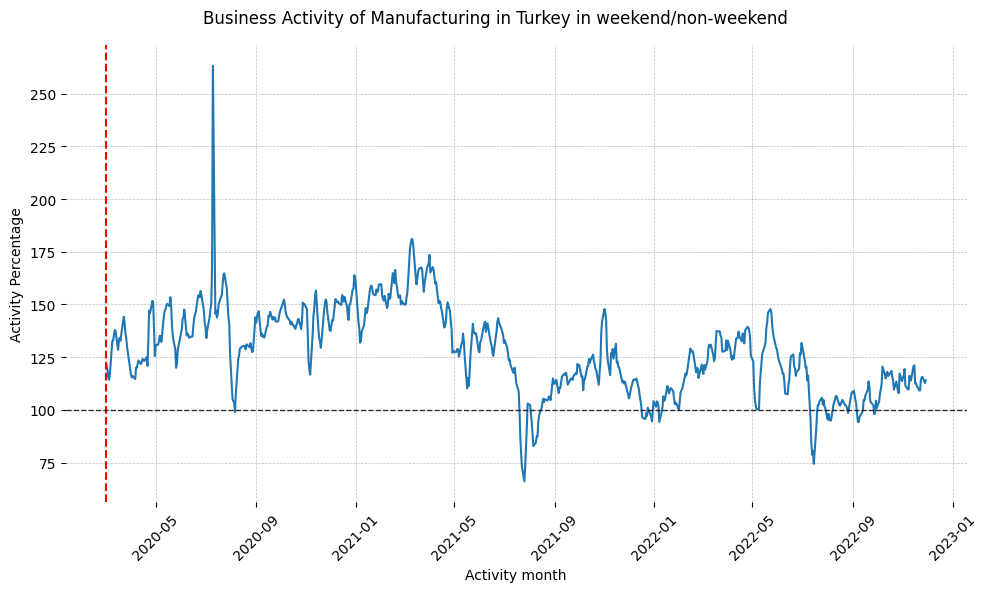

In [32]:
v_df_sorted = combined_df.sort_values('ds', ascending=True)
v_df = v_df_sorted[(v_df_sorted['gadm0_name'] == 'Turkey') & (v_df_sorted['isWeekend'] == 'No')]
countryy = 'Turkey'
# chosen_business_vertical = ['Manufacturing','Public Good', 'Retail','Local Events','Travel']
chosen_business_vertical = ['Manufacturing']
fig, ax = plt.subplots(figsize=(10,6))
for b in chosen_business_vertical:
  v_df = v_df.sort_values(by=['ds'],ascending=True)
  df111 = v_df[v_df['business_vertical'] == b].sort_values(by=['ds'],ascending=True)
  ax.plot(df111['ds'],df111['activity_percentage'],label=b)

fig.suptitle(f'Business Activity of {chosen_business_vertical[0]} in {countryy} in weekend/non-weekend',
                 ha="center")
ax.spines[:].set_visible(False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.set_xlabel('Activity month')
ax.set_ylabel('Activity Percentage')
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
ax.axvline(x=df111['crisis_ds'].iloc[0], color='red', linestyle='--', label='Crisis Date')
ax.axhline(y=100,color='black',linestyle='--',linewidth=1,label='Baseline',alpha=0.8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
combined_df['gadm0_name'].unique()

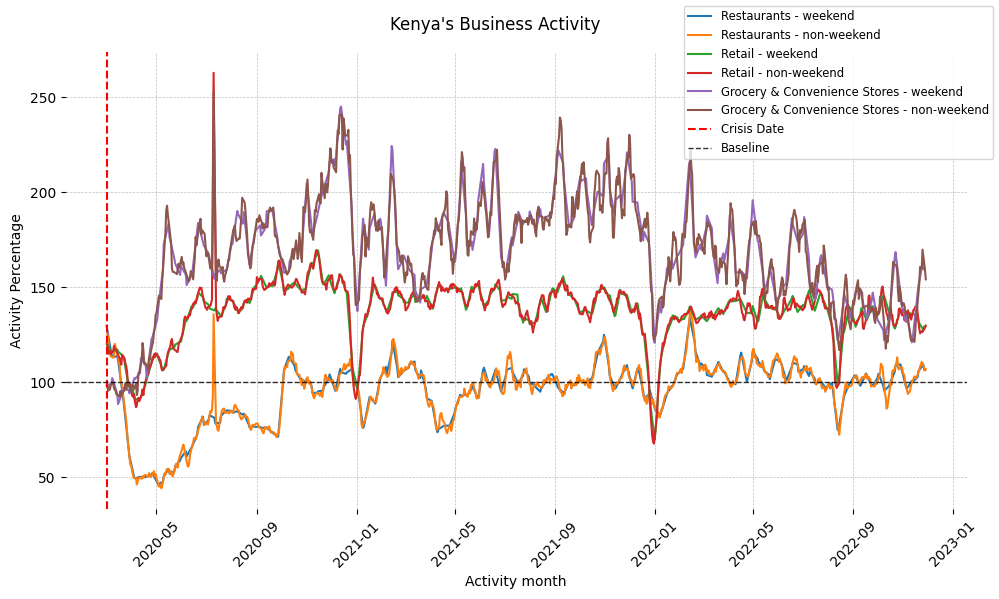

In [34]:
# countryy = 'United States'
# Kenya, Netherlands,
countryy = 'Kenya'
country_wise_df = combined_df[combined_df['gadm0_name'] == countryy]
country_wise_df = country_wise_df.sort_values(by=['ds'],ascending=True)
weekend_dict = {'weekend':'Yes', 'non-weekend':'No'}
# chosen_business_vertical = ['Manufacturing','Public Good', 'Retail','Local Events','Travel']
chosen_business_vertical = ['Restaurants', 'Retail','Grocery & Convenience Stores']
fig, ax = plt.subplots(figsize=(10,6))
for b in chosen_business_vertical:
  b_df = country_wise_df[country_wise_df['business_vertical'] == b].sort_values(by=['ds'],ascending=True)
  for key,value in weekend_dict.items():
    df_new = b_df[b_df['isWeekend'] == weekend_dict[key]]
    lbl = b + ' - ' + key
    ax.plot(df_new['ds'],df_new['activity_percentage'],label=lbl)

fig.suptitle(f'{countryy}\'s Business Activity',
                 ha="center")
# ax.set_xlim(np.datetime64('2020-01-01'), np.datetime64('2022-12-01'))
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.spines[:].set_visible(False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.set_xlabel('Activity month')
ax.set_ylabel('Activity Percentage')
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
ax.axvline(x=df111['crisis_ds'].iloc[0], color='red', linestyle='--', label='Crisis Date')
ax.axhline(y=100,color='black',linestyle='--',linewidth=1,label='Baseline',alpha=0.8)
plt.xticks(rotation=45)
# fig.legend(bbox_to_anchor=(1,1), loc='upper left')
fig.legend(fontsize='small',loc='upper right')
plt.tight_layout()
# plt.savefig(f'{countryy} weekend and non-weekend.png')
# files.download(f'{countryy} weekend and non-weekend.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

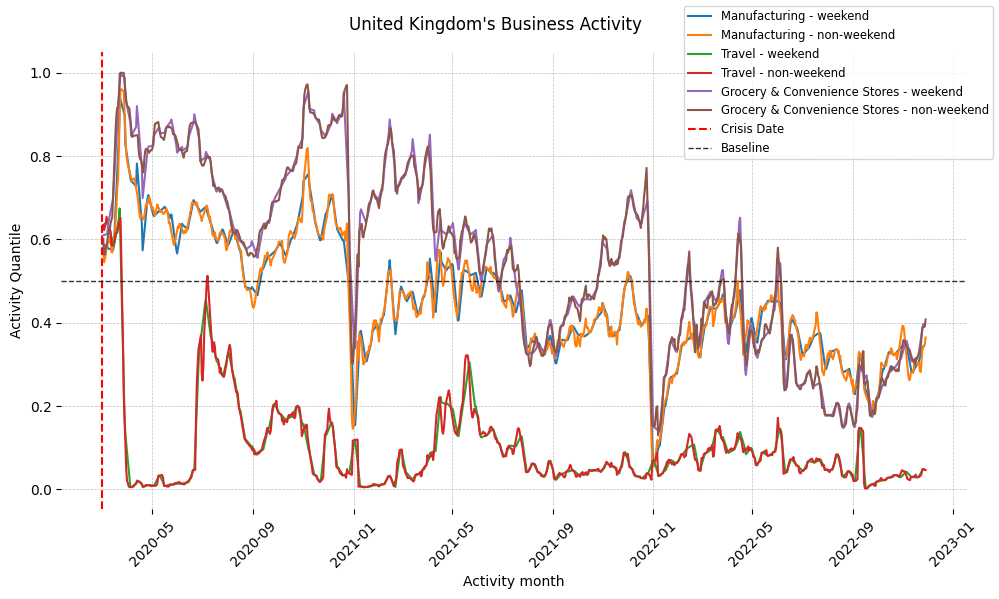

In [ ]:
countryy = 'United Kingdom'
# , , United Kingdom
# countryy = 'Netherlands'
country_wise_df = combined_df[combined_df['gadm0_name'] == countryy]
country_wise_df = country_wise_df.sort_values(by=['ds'],ascending=True)
weekend_dict = {'weekend':'Yes', 'non-weekend':'No'}
# chosen_business_vertical = ['Manufacturing','Public Good', 'Retail','Local Events','Travel']
chosen_business_vertical = ['Manufacturing', 'Travel','Grocery & Convenience Stores']
fig, ax = plt.subplots(figsize=(10,6))
for b in chosen_business_vertical:
  b_df = country_wise_df[country_wise_df['business_vertical'] == b].sort_values(by=['ds'],ascending=True)
  for key,value in weekend_dict.items():
    df_new = b_df[b_df['isWeekend'] == weekend_dict[key]]
    lbl = b + ' - ' + key
    ax.plot(df_new['ds'],df_new['activity_quantile'],label=lbl)

fig.suptitle(f'{countryy}\'s Business Activity',
                 ha="center")
# ax.set_xlim(np.datetime64('2020-01-01'), np.datetime64('2022-12-01'))
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.spines[:].set_visible(False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.set_xlabel('Activity month')
ax.set_ylabel('Activity Quantile')
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
ax.axvline(x=df111['crisis_ds'].iloc[0], color='red', linestyle='--', label='Crisis Date')
ax.axhline(y=0.5,color='black',linestyle='--',linewidth=1,label='Baseline',alpha=0.8)
plt.xticks(rotation=45)
# fig.legend(bbox_to_anchor=(1, 1), loc='upper left')
fig.legend(fontsize='small',loc='upper right')
plt.tight_layout()
plt.savefig(f'{countryy} weekend and non-weekend.png')
files.download(f'{countryy} weekend and non-weekend.png')
plt.show()

In [51]:
def get_country_business_trends(DF,country_list,year,*chosen_business_vertical):
    for country in country_list:
        # uncomment it while using single year
        # df1 = combined_df[(combined_df['gadm0_name'] == country) & (combined_df['activity_year'] == year)]
        df1 = DF[DF['gadm0_name'] == country]
        df1 = df1.sort_values(by=['ds'],ascending=True)
        fig, ax = plt.subplots(figsize=(10,6))
        ax.set_prop_cycle(color=['#1f77b4','#dbdb8d', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
            '#d62728','#9edae5', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
            '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#aec7e8',
            '#17becf', '#ff9896'])
        for b in chosen_business_vertical:
            df111 = df1[df1['business_vertical'] == b].sort_values(by=['ds'],ascending=True)
            # print(df111['ds'].iloc[-1])
            line, = ax.plot(df111['ds'],df111['activity_quantile'],label=b)
            # ax.text(df111['ds'].iloc[-1],df111['activity_percentage'].iloc[-1],b,
            #         color=line.get_color())
            # ax.set_xlim(np.datetime64('2020-01-01'), np.datetime64('2022-12-01'))
        fig.suptitle(f'Business Activity in {country}',
                 ha="center")
        ax.set_xlim(np.datetime64('2020-01-01'), np.datetime64('2022-12-01'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.yaxis.set_major_locator(MultipleLocator(0.1))
        ax.spines[:].set_visible(False)
        ax.yaxis.tick_left()
        ax.xaxis.tick_bottom()
        ax.set_xlabel('Activity month')
        ax.set_ylabel('Activity Quantile')
        ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
        ax.axvline(x=df111['crisis_ds'].iloc[0], color='red', linestyle='--', label='Crisis Date')
        ax.axhline(y=0.5,color='black',linestyle='--',linewidth=1,label='Baseline',alpha=0.8)
        fig.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        # plt.savefig(f'business_activity_in_{country}.png')
        # files.download(f'business_activity_in_{country}.png')
        plt.show()

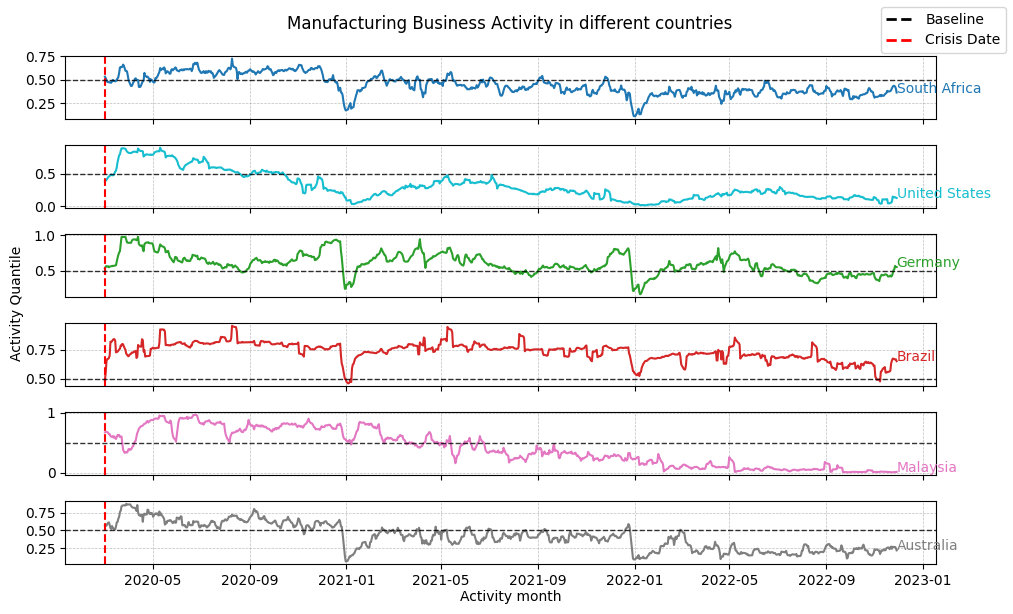

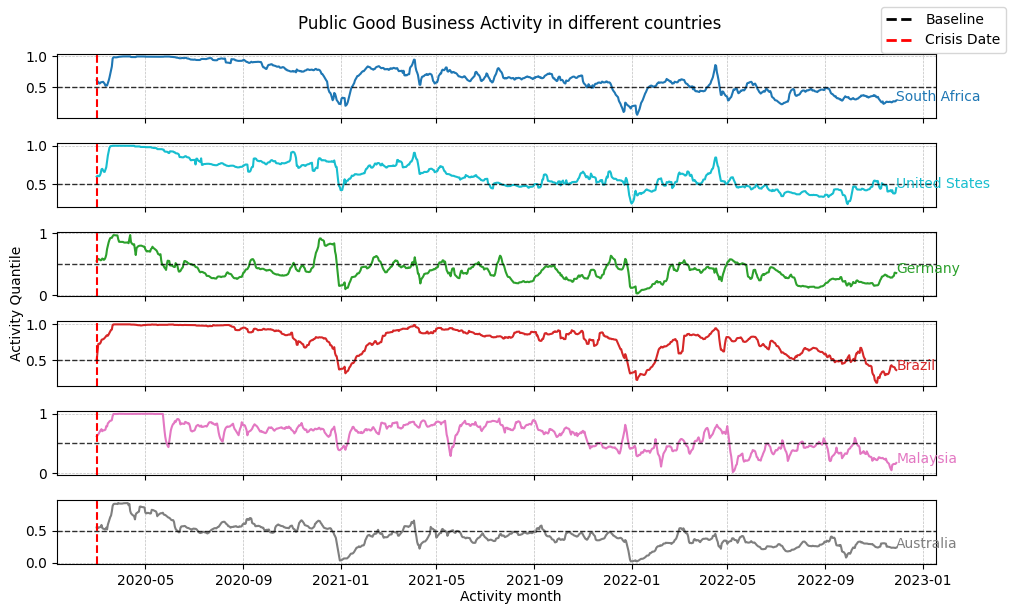

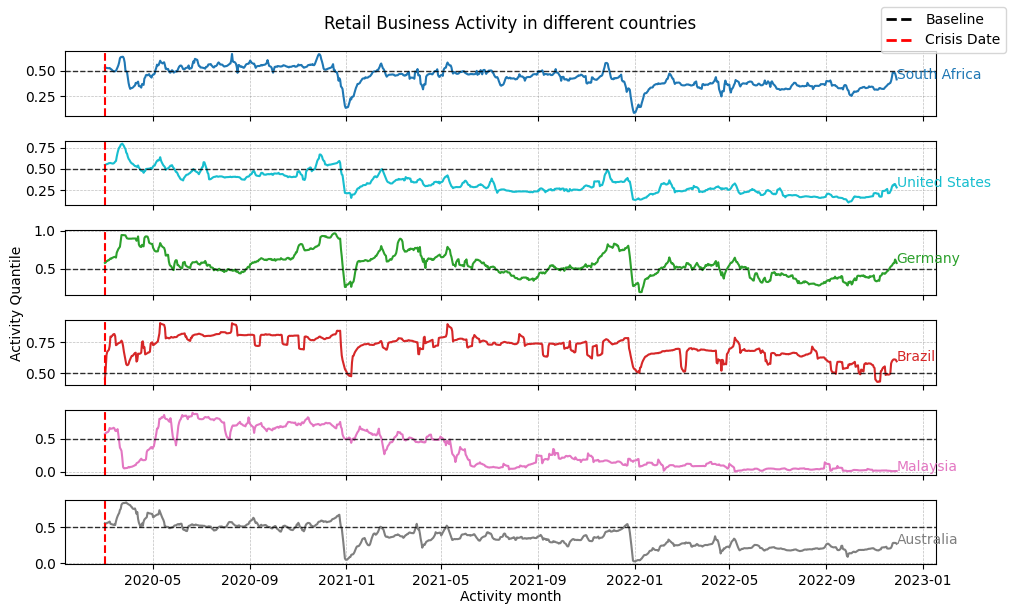

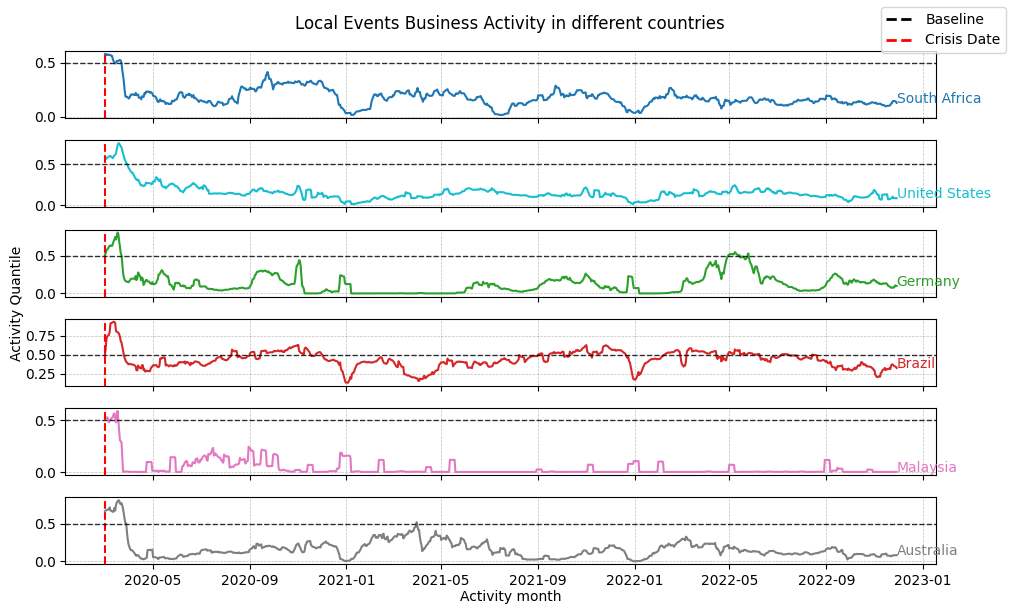

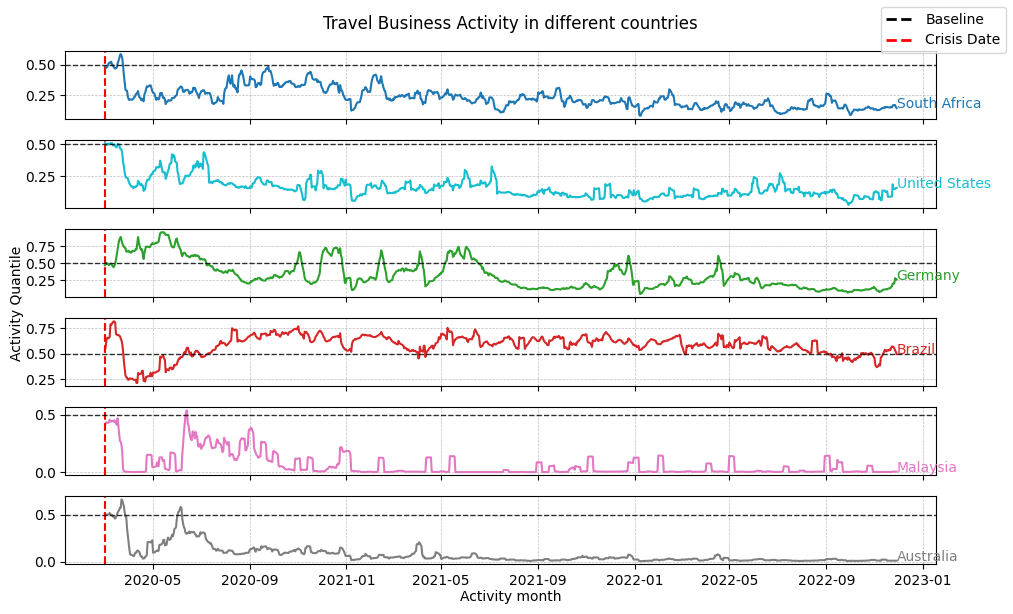

In [47]:
from matplotlib.lines import Line2D
def get_country_business_trends_subplt(DF,country_list,year,chosen_business_vertical):
    fig, axs = plt.subplots(len(country_list),sharex=True,figsize=(10,6))
    colors=['#1f77b4','#17becf', '#2ca02c','#d62728', '#e377c2',
            '#7f7f7f','#9467bd', '#9edae5', '#8c564b', '#c49c94','#98df8a',
            '#c5b0d5', '#f7b6d2', '#c7c7c7', '#bcbd22', '#aec7e8',
            '#dbdb8d', '#ff7f0e', '#ffbb78','#ff9896']
    for idx,(country,color) in enumerate(zip(country_list,colors)):
        fig.suptitle(f'{chosen_business_vertical} Business Activity in different countries',ha="center")
        # uncomment it while using single year
        # df1 = combined_df[(combined_df['gadm0_name'] == country) & (combined_df['activity_year'] == year)]
        df1 = DF[DF['gadm0_name'] == country]
        df1 = df1.sort_values(by=['ds'],ascending=True)
        # for b in chosen_business_vertical:
        df111 = df1[df1['business_vertical'] == chosen_business_vertical].sort_values(by=['ds'],ascending=True)
        line, = axs[idx].plot(df111['ds'],df111['activity_quantile'],color=color)
        axs[idx].text(df111['ds'].iloc[-1],df111['activity_quantile'].iloc[-1],country,color=line.get_color())
        # axs[idx].set_xlim(np.datetime64('2020-01-01'), np.datetime64('2022-12-01'))
        # axs[idx].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        # axs[idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        # axs[idx].yaxis.set_major_locator(MultipleLocator(0.1))
        # axs[idx].spines[:].set_visible(False)
        axs[idx].yaxis.tick_left()
        axs[idx].xaxis.tick_bottom()
        axs[idx].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
    for ax in axs:
      ax.axvline(x=df111['crisis_ds'].iloc[0], color='red', linestyle='--', label='Crisis Date')
      ax.axhline(y=0.5,color='black',linestyle='--',linewidth=1,label='Baseline',alpha=0.8)
      # ax.tick_params(colors='white', which='both')
    base_line = Line2D([0], [0], color='black', linestyle='--', lw=2)
    crisis_line = Line2D([0], [0], color='r', linestyle='--', lw=2)

    fig.legend([base_line, crisis_line], ['Baseline', 'Crisis Date'])
    fig.text(0.00, 0.5, 'Activity Quantile', va='center', rotation='vertical')
    fig.text(0.45, 0.01, 'Activity month', va='center', rotation='horizontal')
    # plt.savefig(f'business_activity_in_{country}.png')
    # files.download(f'business_activity_in_{country}.png')
    plt.tight_layout()
    plt.show()


# Output & call function
business_list = ['Manufacturing','Public Good', 'Retail','Local Events','Travel']
country_list = ['South Africa','United States','Germany', 'Brazil', 'Malaysia','Australia']
# country_list = ['United States']


Year = 2021
for b in business_list:
  get_country_business_trends_subplt(combined_df,country_list,Year,b)

In [ ]:
business_list = ['Manufacturing','Public Good', 'Retail','Local Events','Travel']
country_list = ['South Africa','United States','Germany', 'Brazil', 'Malaysia','Australia']


Year = 2021
get_country_business_trends(combined_df,country_list,Year,'Manufacturing','Public Good', 'Retail','Local Events','Travel')

In [48]:
business_list  = ['Manufacturing','Public Good', 'Retail','Local Events','Travel']
refined_countries_df = country_business_count[country_business_count['business_vertical_list'].apply(lambda x: all(business in x for business in business_list))]

TypeError: 'Axes' object is not subscriptable

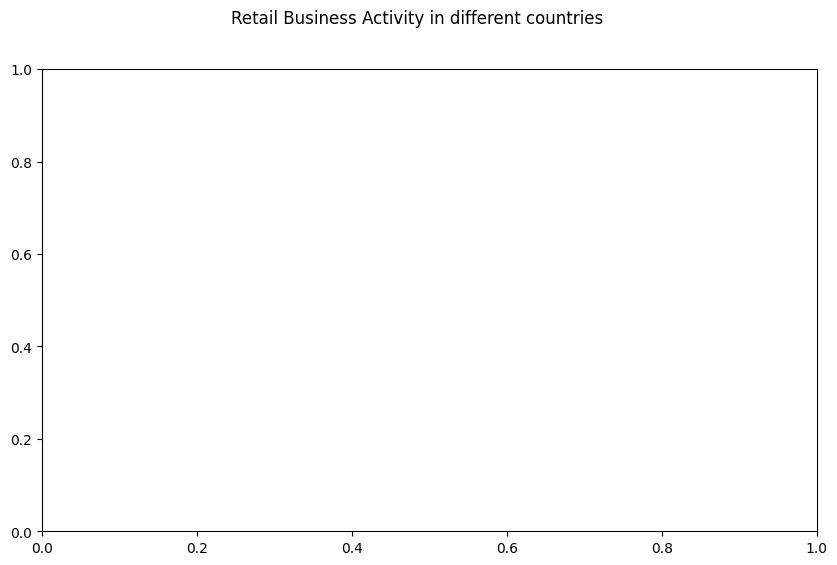

In [43]:
country_list = ['United States']
Year = 2021
# get_country_business_trends(combined_df,country_list,Year,'All')
get_country_business_trends_single(combined_df,country_list,Year,'Retail')

In [49]:
df_all_business = combined_df[combined_df['business_vertical'] == 'All']
df_without_all_business = combined_df[combined_df['business_vertical'] != 'All']

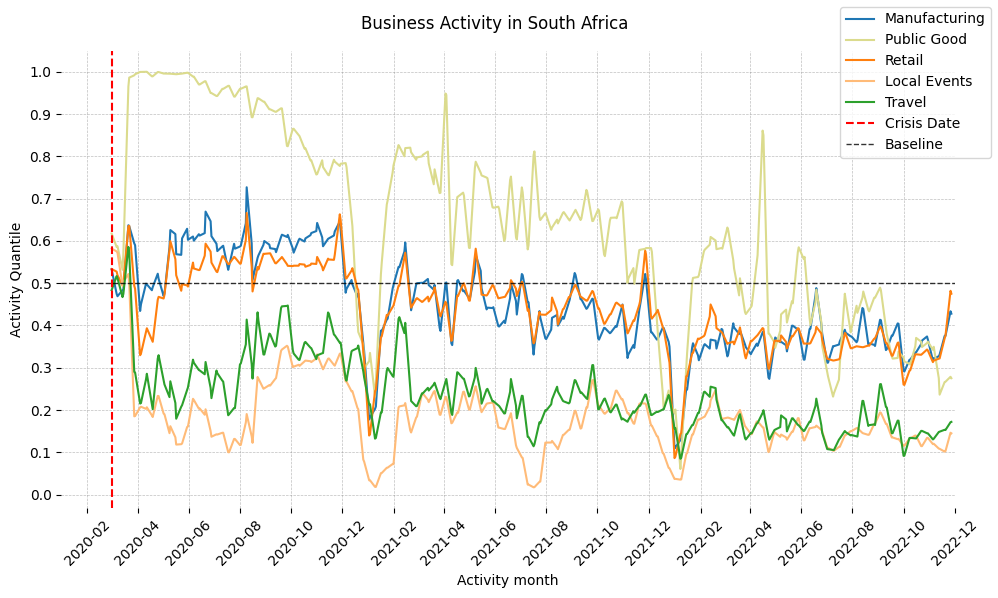

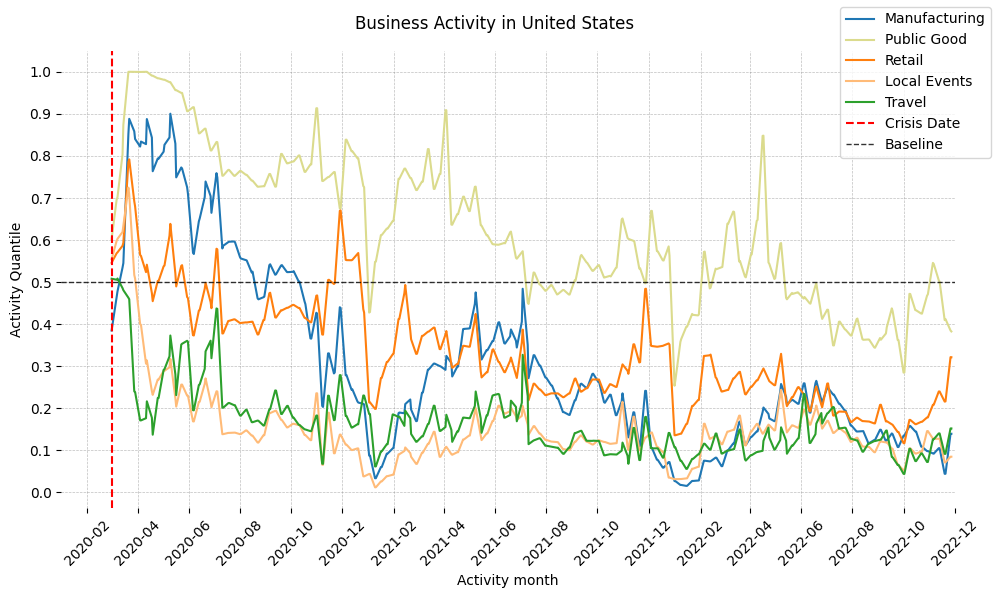

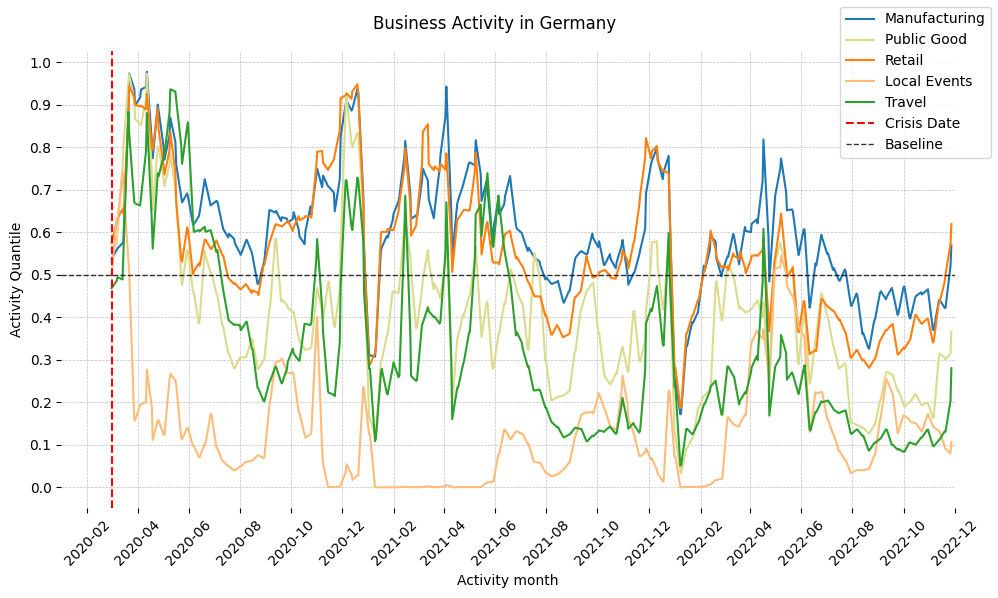

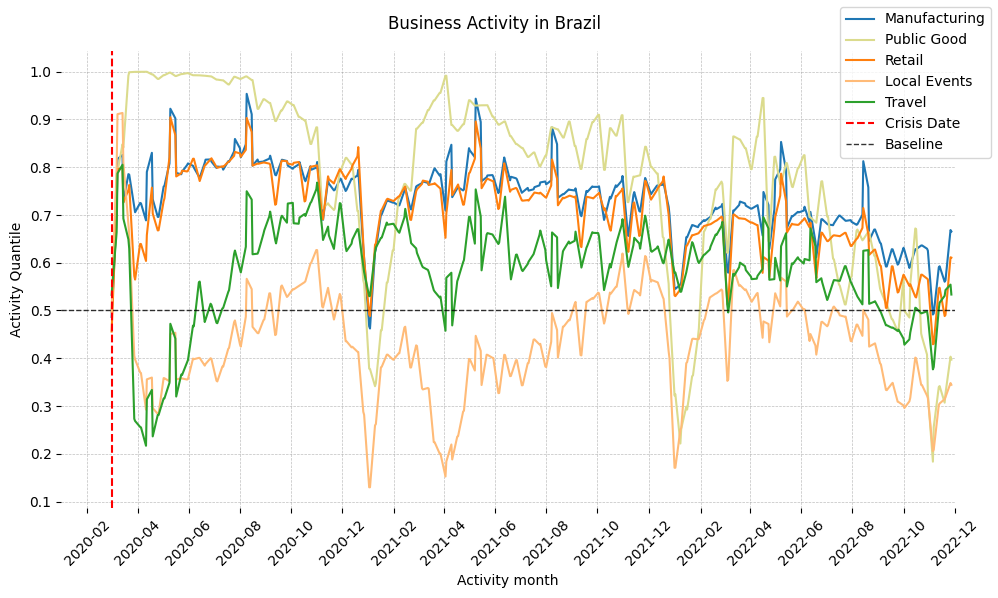

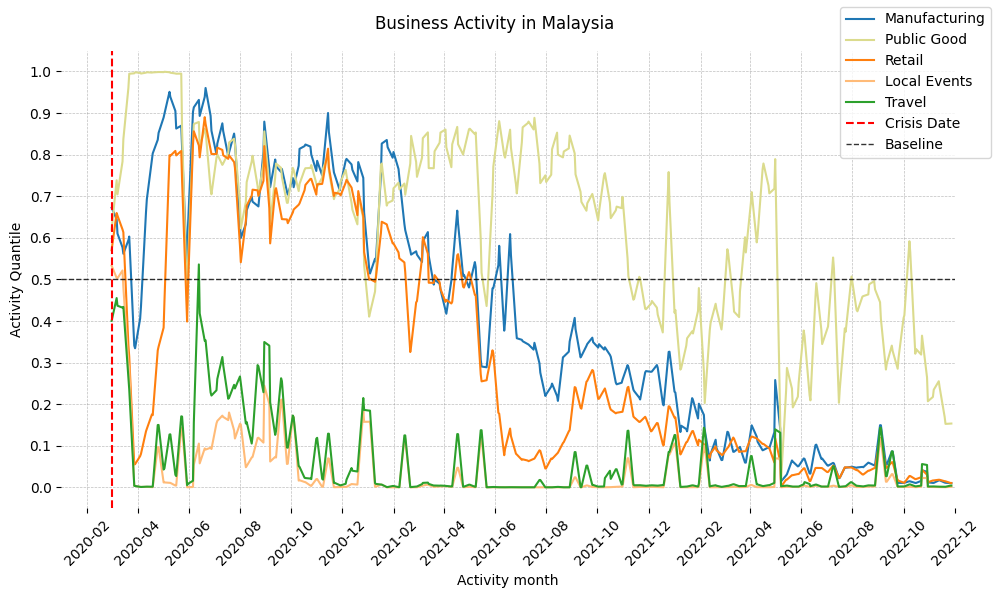

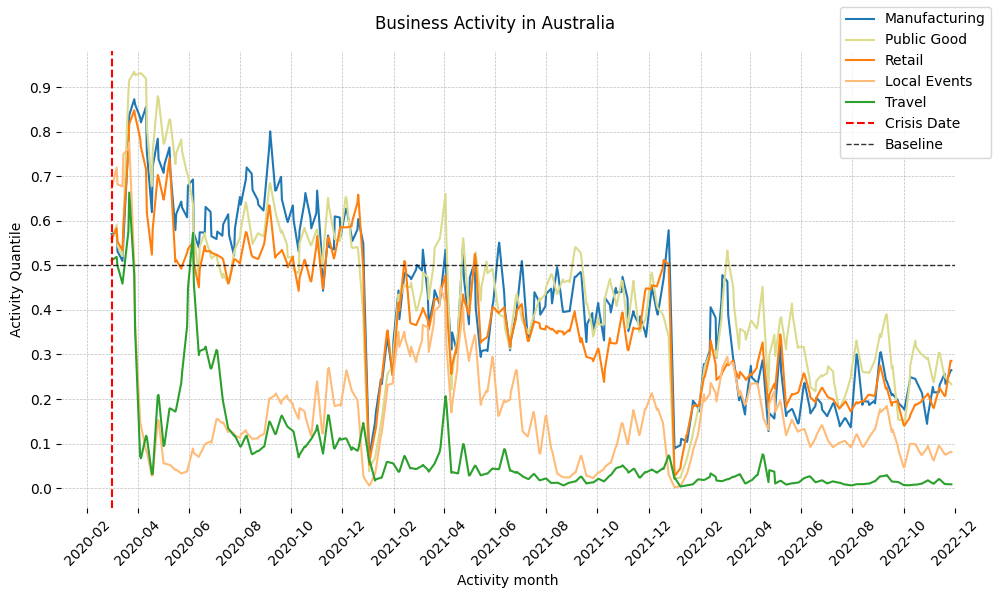

In [52]:
weekend_df = combined_df[combined_df['isWeekend'] == 'Yes']
# country_list = ['Brazil','United States','Germany', 'Lebanon', 'Malaysia','Turkey']
country_list
Year = 2021
# get_country_business_trends(weekned_df,country_list,Year, 'All')
get_country_business_trends(weekend_df,country_list,Year, 'Manufacturing','Public Good', 'Retail','Local Events','Travel')

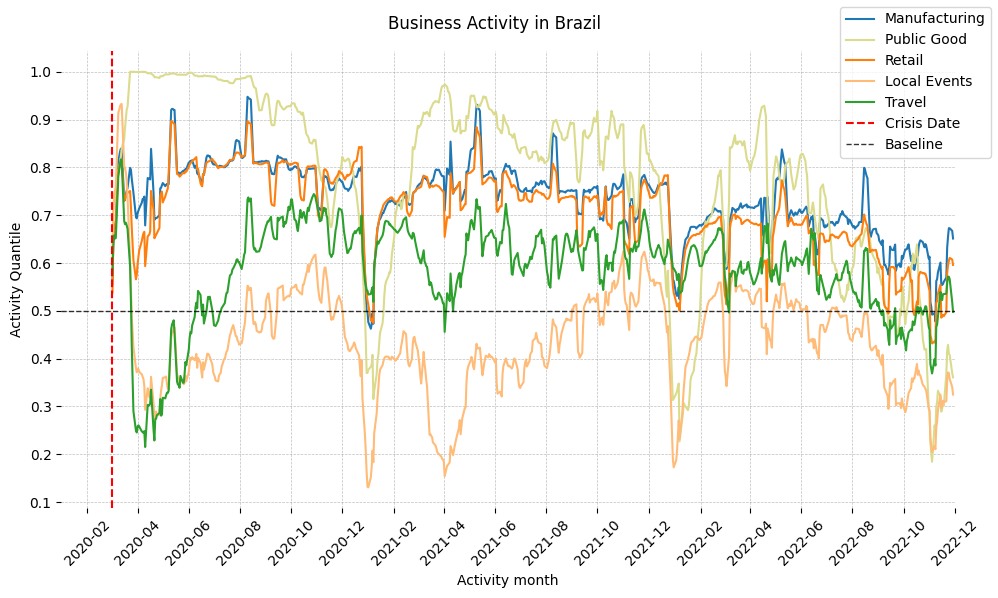

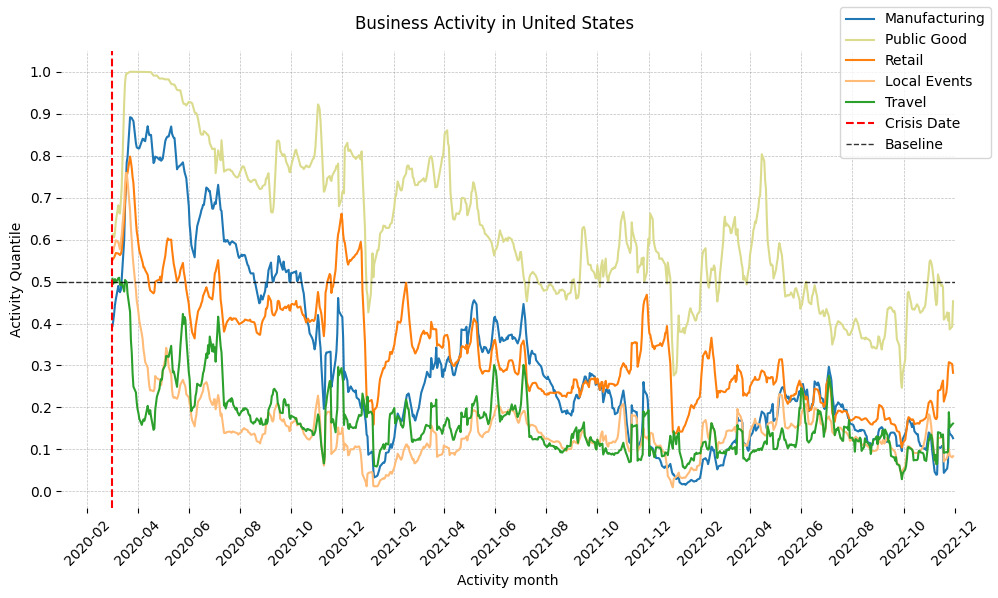

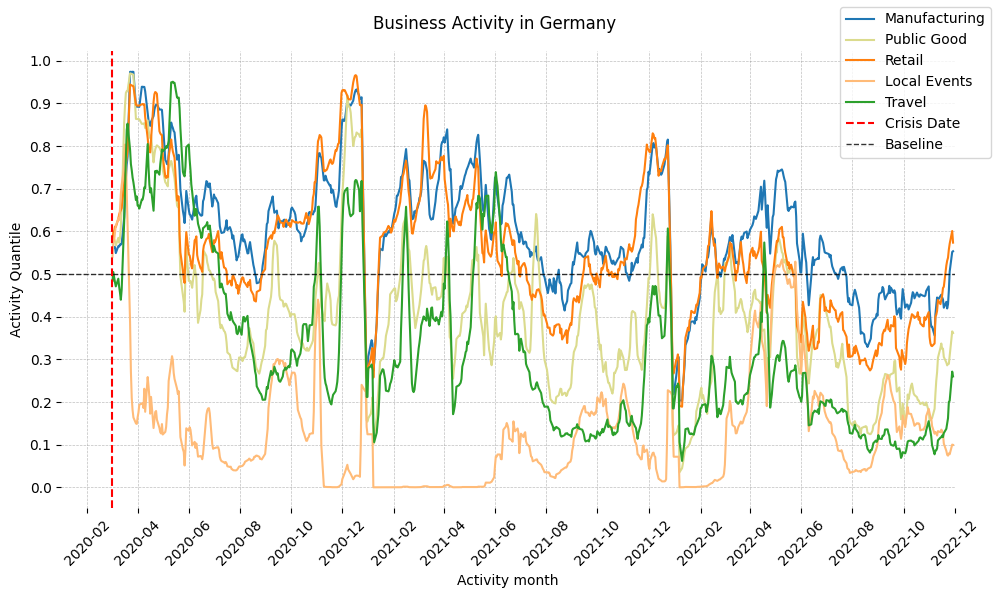

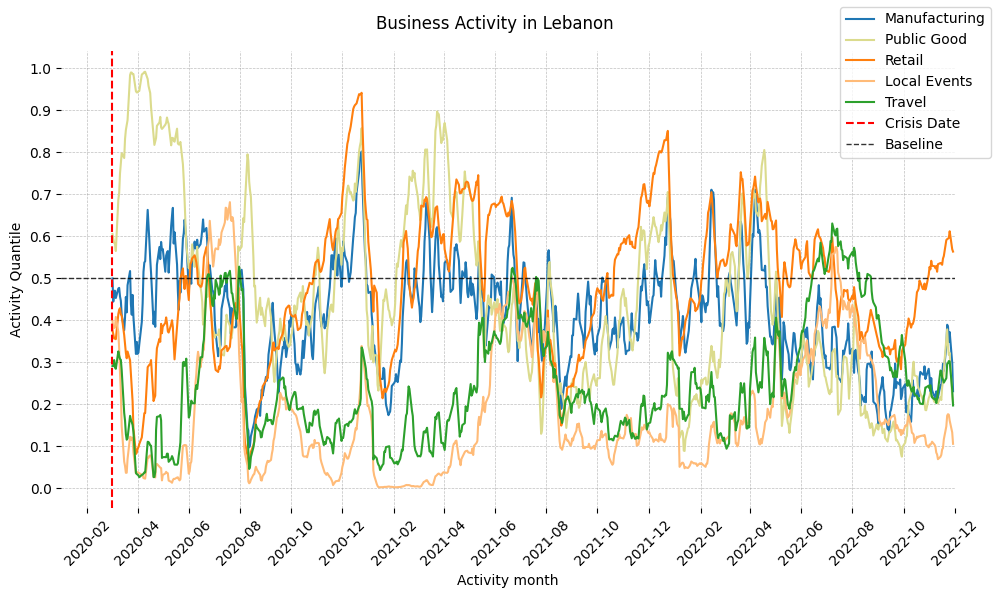

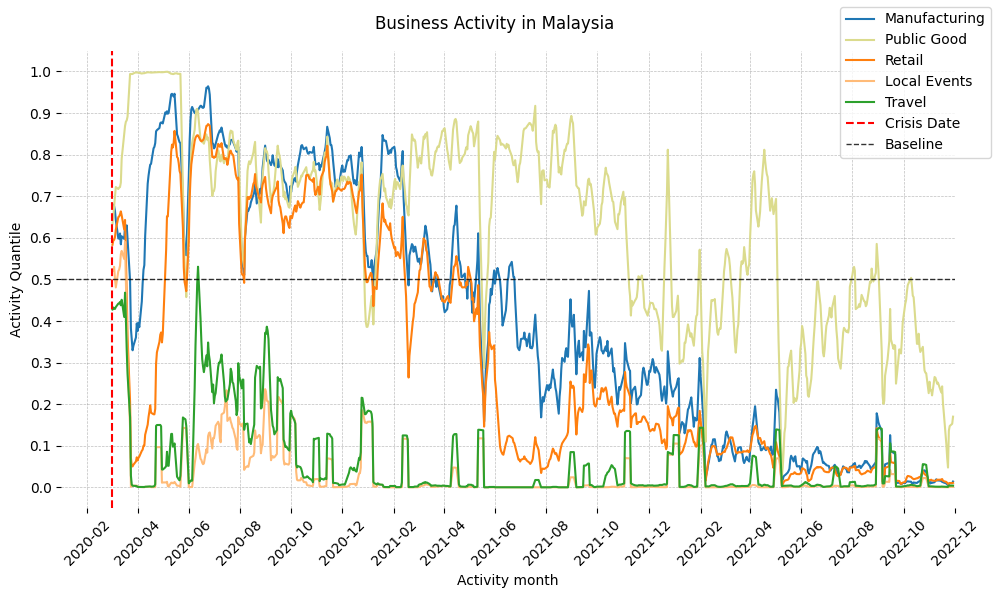

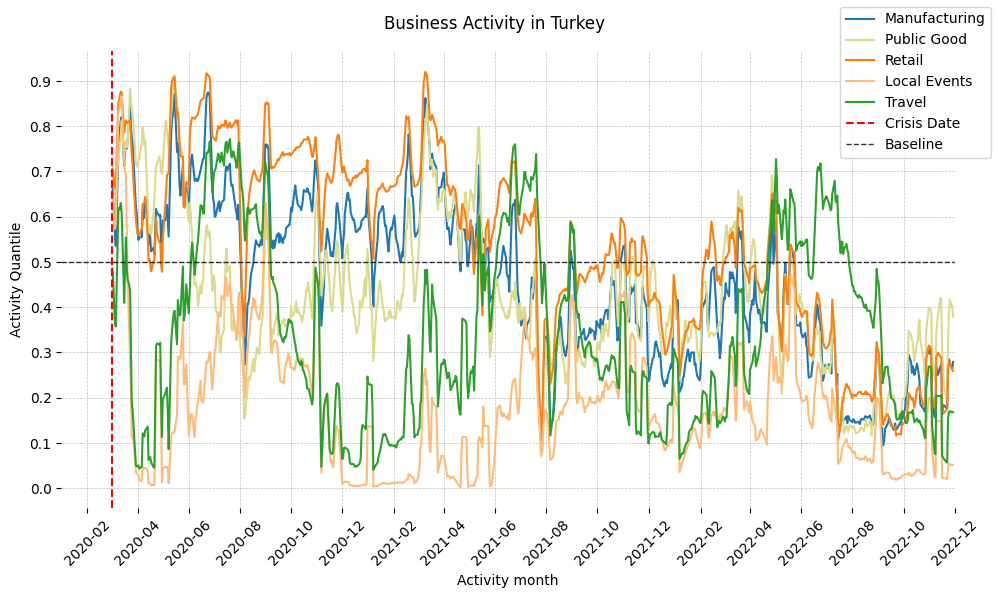

In [53]:
non_weekend_df = combined_df[combined_df['isWeekend'] == 'No']
country_list = ['Brazil','United States','Germany', 'Lebanon', 'Malaysia','Turkey']
Year = 2021
# get_country_business_trends(weekned_df,country_list,Year, 'All')
get_country_business_trends(non_weekend_df,country_list,Year, 'Manufacturing','Public Good', 'Retail','Local Events','Travel')

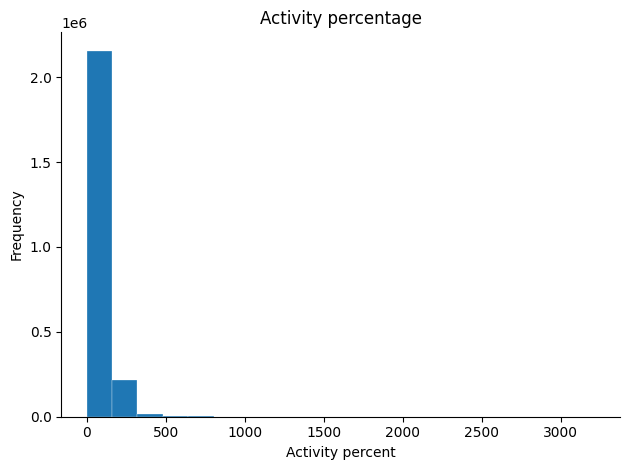

In [54]:
## Activity percentage distribution for ALL Business type

fig,ax = plt.subplots()
bin_edges = np.arange(0, 1400, 100)
ax.hist(combined_df['activity_percentage'],bins=20, linewidth=0.2, edgecolor="white")
ax.set_xlabel('Activity percent')
ax.set_ylabel('Frequency')
ax.set_title('Activity percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()
# plt.savefig('activity_percentage_distribution.png')
# files.download('activity_percentage_distribution.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

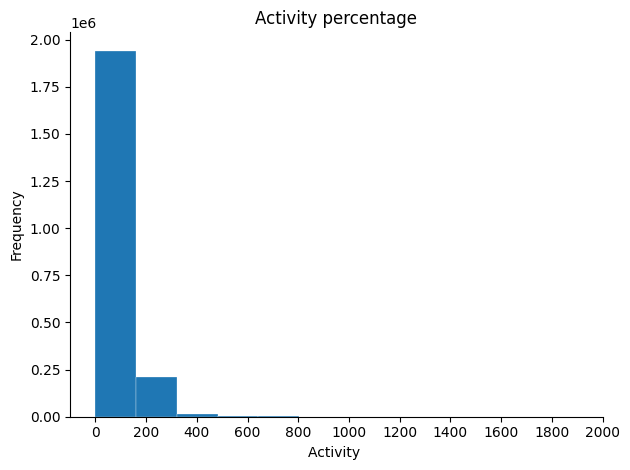

In [55]:
## Activity percentage distribution without ALL Business type

fig,ax = plt.subplots()
ax.hist(df_without_all_business['activity_percentage'],bins=20, linewidth=0.2, edgecolor="white")
ax.set_xlabel('Activity ')
ax.set_ylabel('Frequency')
ax.set_title('Activity percentage')
ax.set_xlim(-100,2000)
ax.xaxis.set_major_locator(plt.MultipleLocator(200))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()
# plt.savefig('activity_percent_distribution.png')
# files.download('activity_percent_distribution.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

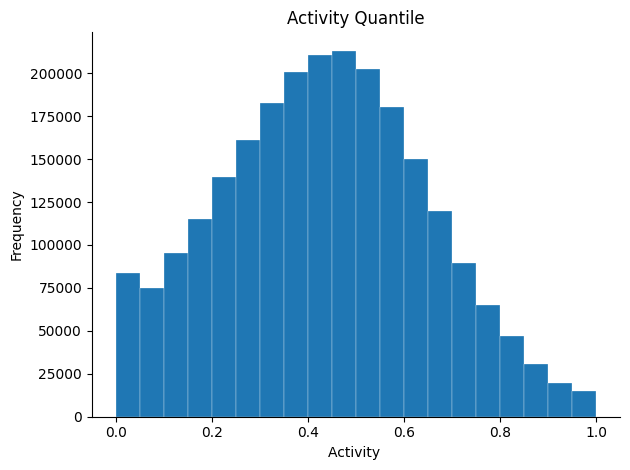

In [ ]:
## Activity quantile distribution for ALL Business type

fig,ax = plt.subplots()
ax.hist(combined_df['activity_quantile'],bins=20, linewidth=0.2, edgecolor="white")
ax.set_xlabel('Activity ')
ax.set_ylabel('Frequency')
ax.set_title('Activity Quantile')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()
plt.savefig('activity_quantile_distribution.png')
files.download('activity_quantile_distribution.png')
plt.show()

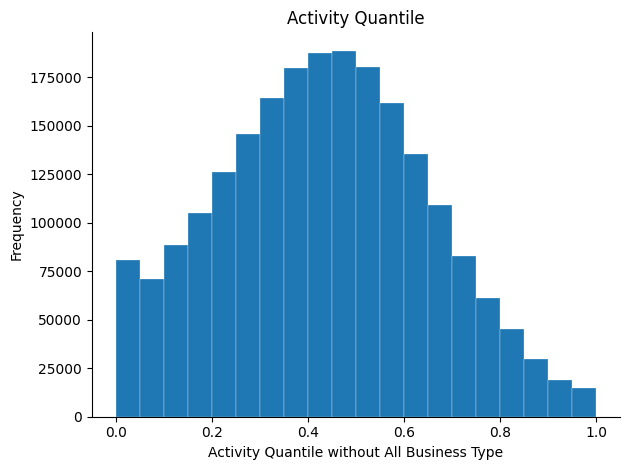

In [56]:
## Activity quantile distribution without  ALL Business type

fig,ax = plt.subplots()
ax.hist(df_without_all_business['activity_quantile'],bins=20, linewidth=0.2, edgecolor="white")
ax.set_xlabel('Activity Quantile without All Business Type')
ax.set_ylabel('Frequency')
ax.set_title('Activity Quantile')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()
plt.show()

# plt.savefig('activity_Quan_dis_without_all.png')
# files.download('activity_Quan_dis_without_all.png')

<ipython-input-57-e9a574bbdd73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_activity.sort_values(by='ds',inplace=True)
<ipython-input-57-e9a574bbdd73>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  year_activity.activity_month.hist().set_xticklabels(months,rotation=45)


[Text(0, 0, 'March'),
 Text(1, 0, 'September'),
 Text(2, 0, 'July'),
 Text(3, 0, 'April'),
 Text(4, 0, 'August'),
 Text(5, 0, 'May'),
 Text(6, 0, 'December'),
 Text(7, 0, 'November'),
 Text(8, 0, 'October'),
 Text(9, 0, 'June')]

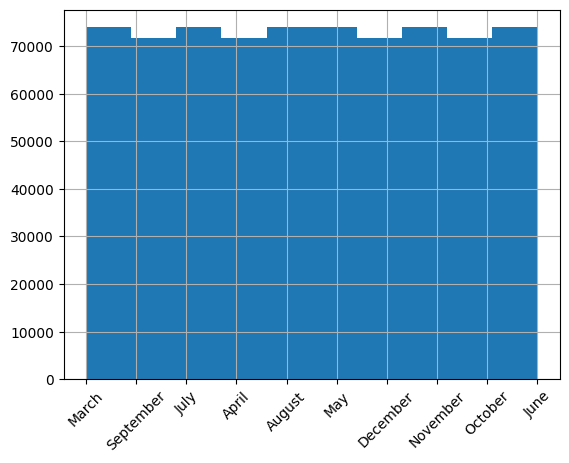

In [57]:
year_activity = combined_df[combined_df['activity_year'] == 2020]
months = year_activity['activity_month'].unique()
year_activity.sort_values(by='ds',inplace=True)
# year_activity
year_activity.activity_month.hist().set_xticklabels(months,rotation=45)
# axx.set_xticklabels(months,rotation=45)

In [ ]:
year_activity = combined_df[combined_df['activity_year'] == 2022]

In [59]:
df_countries = combined_df['gadm_name'].unique()
new_df_countries = pd.DataFrame(df_countries)

In [ ]:
## USING GADM TO PLOT A DATA ON MAPS
gdf = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Assesment Intro to Data Science/all_countries')
gdf = gdf.rename(columns={'GID_0': 'gadm_id','COUNTRY': 'gadm_name'})
# gdf = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Assesment Intro to Data Science/naturalearththeme')
gdf

In [85]:
def get_visuals_on_maps(d1,d2,dataframe):
  day1_df = dataframe[dataframe['ds'] == pd.to_datetime(d1)]
  day2_df = dataframe[dataframe['ds'] == pd.to_datetime(d2)]

  agg1 = day1_df.groupby('gadm_name')['activity_percentage'].mean().reset_index()
  agg2 = day2_df.groupby('gadm_name')['activity_percentage'].mean().reset_index()

  gdm_df1 = gdf.merge(agg1, left_on='SOVEREIGNT', right_on='gadm_name', how='left')
  gdm_df2 = gdf.merge(agg2, left_on='SOVEREIGNT', right_on='gadm_name', how='left')
  # gdm_df1.plot(column='activity_percentage',figsize=(20, 10), cmap='OrRd',linewidth=0.2, edgecolor='0.8',legend=True)
  # gdm_df2.plot(column='activity_percentage',figsize=(20, 10), cmap='OrRd',linewidth=0.2, edgecolor='0.8',legend=True)
  fig, ax = plt.subplots(2,figsize=(20, 10))

  gdm_df1.plot(column='activity_percentage',linewidth=0.2, ax=ax[0], edgecolor='0.8', legend=True, legend_kwds={'shrink': 1})
  ax[0].set_title(f'Business Activity on {d1}')
  # ax[0].axis('off')

  gdm_df2.plot(column='activity_percentage', linewidth=0.2, ax=ax[1], edgecolor='0.8', legend=True, legend_kwds={'shrink': 1})
  ax[1].set_title(f'Business Activity on {d2}')
  # ax[1].axis('off')
  # plt.savefig('visual_on_maps.png')
  # files.download('visual_on_maps.png')
  plt.show()


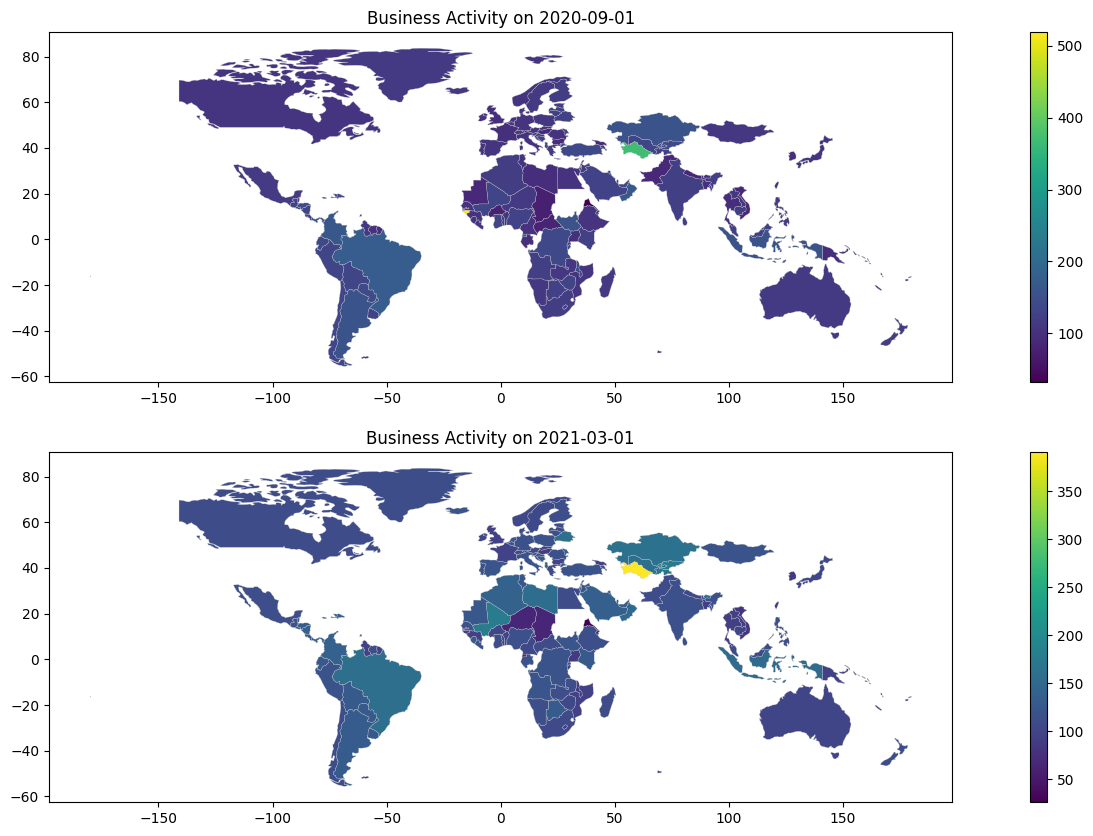

In [86]:
get_visuals_on_maps('2020-09-01','2021-03-01',combined_df)